In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#imporitng the data set using read_spss command
df =  pd.read_spss('secom_mod.SAV',usecols=None, convert_categoricals=True)

#printing the data 
df.head()

,ID,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,1.0,0.0,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2.0,0.0,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,3.0,1.0,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,4.0,0.0,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,5.0,0.0,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


Splitting the data 30% goes for testing

In [3]:
#Splitting the dataset to Test and Train
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

X = df.drop(['class'], axis= 1)
y = df['class']


X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.3,stratify=y, random_state=42)
X_train = X_train.copy()

pd.set_option('display.max_columns', None)

In [4]:
#making the class as categorical value

y_train = y_train.astype('category')
assert y_train.dtype == 'category'

In [5]:
#dropping the timestamp column as it is not used for modelling

X_train = X_train.drop(['ID', 'timestamp'],axis = 1)

In [6]:
X_train

,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,feature010,feature011,feature012,feature013,feature014,feature015,feature016,feature017,feature018,feature019,feature020,feature021,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature029,feature030,feature031,feature032,feature033,feature034,feature035,feature036,feature037,feature038,feature039,feature040,feature041,feature042,feature043,feature044,feature045,feature046,feature047,feature048,feature049,feature050,feature051,feature052,feature053,feature054,feature055,feature056,feature057,feature058,feature059,feature060,feature061,feature062,feature063,feature064,feature065,feature066,feature067,feature068,feature069,feature070,feature071,feature072,feature073,feature074,feature075,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature084,feature085,feature086,feature087,feature088,feature089,feature090,feature091,feature092,feature093,feature094,feature095,feature096,feature097,feature098,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature257,feature258,feature259,feature260,feature261,feature262,feature263,feature264,feature265,feature266,feature267,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature277,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature285,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature314,feature315,feature316,feature317,feature318,feature319,feature320,feature321,feature322,feature323,feature324,feature325,feature326,feature327,feature328,feature329,feature330,feature331,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feature363,featur

Since the data set is just numbers , we can remove the columns which have more than 55% null values,

so we can create a better performaing model.

applying lambda function to select the columns more than 55% null values

In [7]:
X_train1 = X_train.drop(X_train.columns[X_train.apply(lambda col: col.isnull().sum()/len(df) > 0.55)], axis=1)
X_train1

,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,feature010,feature011,feature012,feature013,feature014,feature015,feature016,feature017,feature018,feature019,feature020,feature021,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature029,feature030,feature031,feature032,feature033,feature034,feature035,feature036,feature037,feature038,feature039,feature040,feature041,feature042,feature043,feature044,feature045,feature046,feature047,feature048,feature049,feature050,feature051,feature052,feature053,feature054,feature055,feature056,feature057,feature058,feature059,feature060,feature061,feature062,feature063,feature064,feature065,feature066,feature067,feature068,feature069,feature070,feature071,feature072,feature073,feature074,feature075,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature084,feature085,feature087,feature088,feature089,feature090,feature091,feature092,feature093,feature094,feature095,feature096,feature097,feature098,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature257,feature258,feature259,feature260,feature261,feature262,feature263,feature264,feature265,feature266,feature267,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature277,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature285,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature314,feature315,feature316,feature317,feature318,feature319,feature320,feature321,feature322,feature323,feature324,feature325,feature326,feature327,feature328,feature329,feature330,feature331,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature360,feature361,feature362,feature363,feature364,feature365,feature366,feature367,feature368,feature369,feature370,featur

since the mmodel won't perform well , if column have same value them it is not usable for training the model.

so the columns with single unique values are removed.

In [8]:
X_train2 = X_train1.drop(X_train1.columns[X_train1.apply(lambda col: col.nunique()) == 1],axis=1)
X_train2

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,feature012,feature013,feature015,feature016,feature017,feature018,feature019,feature020,feature021,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature029,feature030,feature031,feature032,feature033,feature034,feature035,feature036,feature037,feature038,feature039,feature040,feature041,feature042,feature044,feature045,feature046,feature047,feature048,feature049,feature051,feature052,feature054,feature055,feature056,feature057,feature058,feature059,feature060,feature061,feature062,feature063,feature064,feature065,feature066,feature067,feature068,feature069,feature071,feature072,feature073,feature074,feature075,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature084,feature085,feature087,feature088,feature089,feature090,feature091,feature092,feature093,feature094,feature095,feature096,feature097,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature181,feature182,feature183,feature184,feature185,feature186,feature188,feature189,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature222,feature223,feature224,feature225,feature226,feature228,feature229,feature239,feature240,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature317,feature318,feature319,feature320,feature321,feature322,feature324,feature325,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature360,feature361,feature362,feature363,feature364,feature366,feature367,feature368,feature369,feature377,feature378,feature383,feature384,feature385,feature386,feature387,feature388,feature389,feature390,feature391,feature392,feature393,feature394,feature406,feature407,feature408,feature409,feature410,feature411,feature412,feature413,feature414,feature416,feature417,feature418,feature419,feature420,feature421,feature422,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature435,feature436,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature444,feature445,feature446,feature447,feature448,feature449,feature453,featur

In [9]:
def outlier_detection_and_replacement(DataSet):
    DataSet.fillna(0)
    Q1 = DataSet.quantile(0.25)
    Q3 = DataSet.quantile(0.75)
    IQR = Q3 - Q1

    DataSet[(DataSet < (Q1 - 1.5 * IQR)) | (DataSet > (Q3 + 1.5 * IQR))] = np.nan
    return DataSet

In [10]:
X_train3 = outlier_detection_and_replacement(X_train2)

In [11]:
#MICE imputation

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer
MICE_imputer = IterativeImputer() 
X_train3_filled = X_train3.copy(deep = True)
X_train3_filled.iloc[:, :] = MICE_imputer.fit_transform(X_train3_filled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [12]:
X_train3_filled 

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,feature012,feature013,feature015,feature016,feature017,feature018,feature019,feature020,feature021,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature029,feature030,feature031,feature032,feature033,feature034,feature035,feature036,feature037,feature038,feature039,feature040,feature041,feature042,feature044,feature045,feature046,feature047,feature048,feature049,feature051,feature052,feature054,feature055,feature056,feature057,feature058,feature059,feature060,feature061,feature062,feature063,feature064,feature065,feature066,feature067,feature068,feature069,feature071,feature072,feature073,feature074,feature075,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature084,feature085,feature087,feature088,feature089,feature090,feature091,feature092,feature093,feature094,feature095,feature096,feature097,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature181,feature182,feature183,feature184,feature185,feature186,feature188,feature189,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature222,feature223,feature224,feature225,feature226,feature228,feature229,feature239,feature240,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature317,feature318,feature319,feature320,feature321,feature322,feature324,feature325,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature360,feature361,feature362,feature363,feature364,feature366,feature367,feature368,feature369,feature377,feature378,feature383,feature384,feature385,feature386,feature387,feature388,feature389,feature390,feature391,feature392,feature393,feature394,feature406,feature407,feature408,feature409,feature410,feature411,feature412,feature413,feature414,feature416,feature417,feature418,feature419,feature420,feature421,feature422,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature435,feature436,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature444,feature445,feature446,feature447,feature448,feature449,feature453,featur

In [13]:
X1 = X_train3_filled 
Y1 = y_train.dropna()

In [14]:
X1.shape

(1096, 466)

In [15]:
#Feature selection based on RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [16]:
lin_reg = LinearRegression()

In [17]:
rfe = RFE(lin_reg, 80) # selecting best 80 features for the model 
rfe.fit(X1, Y1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=80 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LinearRegression(), n_features_to_select=80)

In [18]:
print(f"Number of selected features: {rfe.n_features_}\n\
Mask: {rfe.support_}\n\
Selected Features:", [feature for feature, rank in zip(X1.columns.values, rfe.ranking_) if rank==1],"\n\
Estimator : {rfe.estimator_}")

Number of selected features: 80
Mask: [False False False False False False False False False False False  True
 False False  True  True  True False False False False False False False
 False False False False False False False False  True False  True False
 False False False False  True False  True False False  True  True False
  True  True False  True  True False False  True False  True False False
 False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False  True  True  True  True False False False  True  True False False
  True  True  True False False  True False False False False False False
  True False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False  True False False False False  True
 False False False False False False False False False False False False
 False False 

In [19]:
#Getting the sleected features and malking it as Dataset

X1_RFE = X1[['feature013', 'feature017', 'feature018', 'feature019', 'feature035', 'feature037', 'feature044', 'feature046', 'feature049', 'feature051', 'feature054', 'feature055', 'feature057', 'feature058', 'feature061', 'feature063', 'feature069', 'feature071', 'feature093', 'feature094', 'feature095', 'feature096', 'feature101', 'feature102', 'feature105', 'feature106', 'feature107', 'feature110', 'feature117', 'feature132', 'feature148', 'feature154', 'feature173', 'feature175', 'feature178', 'feature197', 'feature202', 'feature213', 'feature217', 'feature220', 'feature223', 'feature228', 'feature229', 'feature239', 'feature240', 'feature245', 'feature252', 'feature255', 'feature279', 'feature283', 'feature289', 'feature308', 'feature310', 'feature333', 'feature338', 'feature351', 'feature355', 'feature358', 'feature361', 'feature366', 'feature367', 'feature369', 'feature377', 'feature378', 'feature383', 'feature390', 'feature393', 'feature444', 'feature446', 'feature449', 'feature527', 'feature544', 'feature545', 'feature579', 'feature581', 'feature582', 'feature584', 'feature587', 'feature588', 'feature590']]

In [20]:
X1_RFE

,feature013,feature017,feature018,feature019,feature035,feature037,feature044,feature046,feature049,feature051,feature054,feature055,feature057,feature058,feature061,feature063,feature069,feature071,feature093,feature094,feature095,feature096,feature101,feature102,feature105,feature106,feature107,feature110,feature117,feature132,feature148,feature154,feature173,feature175,feature178,feature197,feature202,feature213,feature217,feature220,feature223,feature228,feature229,feature239,feature240,feature245,feature252,feature255,feature279,feature283,feature289,feature308,feature310,feature333,feature338,feature351,feature355,feature358,feature361,feature366,feature367,feature369,feature377,feature378,feature383,feature390,feature393,feature444,feature446,feature449,feature527,feature544,feature545,feature579,feature581,feature582,feature584,feature587,feature588,feature590
292,199.3001,10.6140,0.977600,188.6861,50.2150,49.7850,348.4982,134.4545,137.3409,620.2936,4.610000,4.849000,0.9366,0.9506,347.8236,116.4918,146.7618,611.0773,0.005000,-0.0044,0.000000,0.000200,0.0001,0.000100,0.000000,-0.00500,0.0044,0.978915,0.990100,0.9965,0.010100,0.006200,0.2871,0.2871,0.232000,6.10,6.10,0.024500,0.0773,0.0023,0.004600,0.018000,0.016900,0.0051,0.0029,0.000983,0.000600,0.0041,0.0014,0.003500,0.002000,0.1094,0.1094,1.9011,1.9011,0.010200,0.0418,0.0007,0.00130,0.005200,0.004900,0.003500,0.0016,0.0011,0.000572,0.000200,0.0012,0.5717,0.5767,0.196400,0.4162,0.007800,0.002600,0.028559,0.003279,81.345600,0.0178,0.0291,0.0237,81.345600
1416,197.3447,9.6066,0.970600,187.7381,50.4775,49.5225,368.7700,144.2836,132.9627,646.0164,4.648000,4.889000,0.9180,0.9506,367.7091,122.4327,145.4282,635.5700,0.002000,-0.0025,-0.000200,0.000000,-0.0005,-0.000100,0.000800,-0.00210,0.0025,0.982200,0.989500,0.9970,0.016500,0.014100,0.2536,0.2536,0.295000,10.62,10.62,0.062800,0.0300,0.0038,0.000900,0.018200,0.012500,0.0035,0.0040,0.002300,0.001000,0.0045,0.0010,0.005500,0.004300,0.0966,0.0966,3.2887,3.2887,0.030800,0.0133,0.0012,0.00030,0.005500,0.003400,0.001600,0.0011,0.0014,0.000700,0.000400,0.0013,0.5024,0.5121,0.251200,0.4585,0.008439,0.002242,0.014900,0.005000,107.242700,0.0099,0.0149,0.0160,107.242700
385,201.8757,10.5391,0.969576,191.3366,50.3421,49.6579,362.3273,149.1491,135.5109,646.9873,4.550000,4.794000,0.9228,0.9492,364.5864,123.8136,145.2645,633.6645,0.001626,0.0026,0.000116,-0.000100,-0.0003,0.000114,0.000500,-0.00166,-0.0025,0.982297,0.990873,1.0000,0.023721,0.014878,0.4484,0.4484,0.246000,10.64,10.64,0.044900,0.0967,0.0034,0.001100,0.008443,0.011219,0.0069,0.0037,0.000802,0.000840,0.0049,0.0009,0.007776,0.004733,0.1794,0.1794,2.7980,2.7980,0.020600,0.0494,0.0013,0.00040,0.002688,0.002614,0.003037,0.0023,0.0012,0.000260,0.000300,0.0016,0.8907,0.9030,0.207700,0.4958,0.007800,0.002600,0.005600,0.002500,127.248300,0.0096,0.0056,0.0071,127.248300
272,199.4865,9.6426,0.973000,189.8439,50.3999,49.6001,350.0873,132.3436,134.3455,616.7764,4.584000,4.814000,0.9360,0.9523,347.7791,113.8455,147.1064,608.7309,-0.000100,-0.0013,0.000200,0.000037,0.0001,0.000076,0.000600,0.00010,0.0013,0.976996,0.991102,0.9970,0.006100,0.005800,0.3812,0.3812,0.247000,6.77,6.77,0.104700,0.0878,0.0026,0.001700,0.009100,0.022600,0.0046,0.0029,0.002724,0.000789,0.0179,0.0010,0.002000,0.002000,0.1579,0.1579,2.0387,2.0387,0.046100,0.0393,0.0008,0.00050,0.002800,0.005000,0.004800,0.0016,0.0009,0.000657,0.000299,0.0054,0.7564,0.7685,0.209300,1.8579,0.007800,0.002600,0.027291,0.004674,51.906700,0.0170,0.0274,0.0142,51.906700
667,197.7375,9.9427,0.965200,187.7949,50.1240,49.8760,352.9045,131.9909,148.5873,633.4827,4.625000,4.848000,0.9346,0.9541,353.6555,112.8673,148.4318,614.9545,0.002100,0.0003,0.000000,0.000100,-0.0001,0.000000,-0.000300,-0.00210,-0.0003,0.978373,0.990800,0.9991,0.015500,0.014900,0.1596,0.1596,0.280067,10.75,10.75,0.052895,0.0343,0.0035,0.009300,0.019000,0.010400,0.0066,0.0057,0.001440,0.001100,0.0180,0.0013,0.005000,0.004800,0.0669,0.0669,3.3387,3.3387,0.024235,0.0160,0.0010,

In [21]:
#importing SMOTE

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X1_RFE, Y1)

print(f'''Shape of X before SMOTE: {X1_RFE.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (1096, 80)
Shape of X after SMOTE: (2060, 80)

Balance of positive and negative classes (%):


0.0    50.0
1.0    50.0
Name: class, dtype: float64

# TEST DATA 

In [22]:
#dropping the timestamp column as it is not used for modelling

X_test = X_test.drop(['ID', 'timestamp'],axis = 1)

In [23]:
#making the class as categorical value

y_test = y_test.astype('category')
assert y_test.dtype == 'category'

since the data set is just numbers , we can remove the columns which have more than 55% null values

so we can create a better performaing model.

applying lambda function to select the columns more than 55% null values

In [24]:
X_test1 = X_test.drop(X_test.columns[X_test.apply(lambda col: col.isnull().sum()/len(df) > 0.55)], axis=1)
X_test1

,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,feature010,feature011,feature012,feature013,feature014,feature015,feature016,feature017,feature018,feature019,feature020,feature021,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature029,feature030,feature031,feature032,feature033,feature034,feature035,feature036,feature037,feature038,feature039,feature040,feature041,feature042,feature043,feature044,feature045,feature046,feature047,feature048,feature049,feature050,feature051,feature052,feature053,feature054,feature055,feature056,feature057,feature058,feature059,feature060,feature061,feature062,feature063,feature064,feature065,feature066,feature067,feature068,feature069,feature070,feature071,feature072,feature073,feature074,feature075,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature084,feature085,feature086,feature087,feature088,feature089,feature090,feature091,feature092,feature093,feature094,feature095,feature096,feature097,feature098,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature257,feature258,feature259,feature260,feature261,feature262,feature263,feature264,feature265,feature266,feature267,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature277,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature285,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature314,feature315,feature316,feature317,feature318,feature319,feature320,feature321,feature322,feature323,feature324,feature325,feature326,feature327,feature328,feature329,feature330,feature331,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feature363,featur

since the mmodel wont perform well , if column have same value them it is not usable for training the model.

so the columns with single unique values are removed.

In [25]:
X_test2 = X_test1.drop(X_test1.columns[X_test1.apply(lambda col: col.nunique()) == 1],axis=1)
X_test2

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,feature012,feature013,feature015,feature016,feature017,feature018,feature019,feature020,feature021,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature029,feature030,feature031,feature032,feature033,feature034,feature035,feature036,feature037,feature038,feature039,feature040,feature041,feature042,feature044,feature045,feature046,feature047,feature048,feature049,feature051,feature052,feature054,feature055,feature056,feature057,feature058,feature059,feature060,feature061,feature062,feature063,feature064,feature065,feature066,feature067,feature068,feature069,feature071,feature072,feature073,feature074,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature084,feature085,feature086,feature087,feature088,feature089,feature090,feature091,feature092,feature093,feature094,feature095,feature096,feature097,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature181,feature182,feature183,feature184,feature185,feature186,feature188,feature189,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature208,feature209,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature228,feature229,feature239,feature240,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature317,feature318,feature319,feature320,feature321,feature322,feature324,feature325,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature344,feature345,feature346,feature347,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feature363,feature364,feature366,feature367,feature368,feature369,feature377,feature378,feature383,feature384,feature385,feature386,feature387,feature388,feature389,feature390,feature391,feature392,feature393,feature394,feature406,feature407,feature408,feature409,feature410,feature411,feature412,feature413,feature414,feature416,feature417,feature418,feature419,feature420,feature421,feature422,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature435,feature436,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature444,feature445,feature446,feature447,feature448,featur

In [26]:
#:: OUTLIERS HANDLING ::
X_test3 = outlier_detection_and_replacement(X_test2)

In [27]:
#MICE imputation

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer
MICE_imputer = IterativeImputer() 
X_test3_filled = X_test3.copy(deep = True)
X_test3_filled.iloc[:, :] = MICE_imputer.fit_transform(X_test3_filled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [28]:
X_test3_filled

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,feature012,feature013,feature015,feature016,feature017,feature018,feature019,feature020,feature021,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature029,feature030,feature031,feature032,feature033,feature034,feature035,feature036,feature037,feature038,feature039,feature040,feature041,feature042,feature044,feature045,feature046,feature047,feature048,feature049,feature051,feature052,feature054,feature055,feature056,feature057,feature058,feature059,feature060,feature061,feature062,feature063,feature064,feature065,feature066,feature067,feature068,feature069,feature071,feature072,feature073,feature074,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature084,feature085,feature086,feature087,feature088,feature089,feature090,feature091,feature092,feature093,feature094,feature095,feature096,feature097,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature181,feature182,feature183,feature184,feature185,feature186,feature188,feature189,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature208,feature209,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature228,feature229,feature239,feature240,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature317,feature318,feature319,feature320,feature321,feature322,feature324,feature325,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature344,feature345,feature346,feature347,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feature363,feature364,feature366,feature367,feature368,feature369,feature377,feature378,feature383,feature384,feature385,feature386,feature387,feature388,feature389,feature390,feature391,feature392,feature393,feature394,feature406,feature407,feature408,feature409,feature410,feature411,feature412,feature413,feature414,feature416,feature417,feature418,feature419,feature420,feature421,feature422,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature435,feature436,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature444,feature445,feature446,feature447,feature448,featur

In [29]:
#dropping the ID column and assigning the test values

X2 = X_test3_filled
Y2 = y_test.dropna()

In [30]:
#Feature selection based on RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
lin_reg = LinearRegression()

In [32]:
rfe = RFE(lin_reg, 80) # selecting best 80 features for the model 
rfe.fit(X2, Y2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=80 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LinearRegression(), n_features_to_select=80)

In [33]:
print(f"Number of selected features: {rfe.n_features_}\n\
Mask: {rfe.support_}\n\
Selected Features:", [feature for feature, rank in zip(X2.columns.values, rfe.ranking_) if rank==1],"\n\
Estimator : {rfe.estimator_}")

Number of selected features: 80
Mask: [False False False False False False False False False  True False  True
 False False  True False  True False False False False False False False
 False False False False False False False False  True False  True False
 False False False False False False False False False False False False
  True  True False False  True False False  True False  True False False
 False False False  True  True False False False False False False False
 False False False False False False  True False False False False False
 False  True False False  True False False False False  True False False
  True  True False False False  True False False False  True False False
 False False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False  True False  True False  True False False False False False
 False False False  True False False False False False False False False
 False False 

In [34]:
#Getting the sleected features and malking it as Dataset

X2_RFE = X2[['feature011', 'feature013', 'feature017', 'feature019', 'feature035', 'feature037', 'feature054', 'feature055', 'feature058', 'feature061', 'feature063', 'feature069', 'feature071', 'feature086', 'feature093', 'feature096', 'feature102', 'feature105', 'feature106', 'feature110', 'feature114', 'feature119', 'feature120', 'feature144', 'feature146', 'feature148', 'feature158', 'feature172', 'feature173', 'feature175', 'feature177', 'feature197', 'feature202', 'feature212', 'feature213', 'feature217', 'feature220', 'feature222', 'feature225', 'feature240', 'feature249', 'feature252', 'feature255', 'feature279', 'feature281', 'feature282', 'feature283', 'feature289', 'feature293', 'feature300', 'feature304', 'feature307', 'feature308', 'feature310', 'feature312', 'feature321', 'feature333', 'feature338', 'feature350', 'feature351', 'feature352', 'feature355', 'feature358', 'feature359', 'feature360', 'feature361', 'feature363', 'feature369', 'feature378', 'feature387', 'feature390', 'feature392', 'feature393', 'feature448', 'feature545', 'feature580', 'feature581', 'feature585', 'feature587', 'feature588']]

In [35]:
X2_RFE

,feature011,feature013,feature017,feature019,feature035,feature037,feature054,feature055,feature058,feature061,feature063,feature069,feature071,feature086,feature093,feature096,feature102,feature105,feature106,feature110,feature114,feature119,feature120,feature144,feature146,feature148,feature158,feature172,feature173,feature175,feature177,feature197,feature202,feature212,feature213,feature217,feature220,feature222,feature225,feature240,feature249,feature252,feature255,feature279,feature281,feature282,feature283,feature289,feature293,feature300,feature304,feature307,feature308,feature310,feature312,feature321,feature333,feature338,feature350,feature351,feature352,feature355,feature358,feature359,feature360,feature361,feature363,feature369,feature378,feature387,feature390,feature392,feature393,feature448,feature545,feature580,feature581,feature585,feature587,feature588
711,0.0091,201.7700,9.2755,192.4945,50.350500,49.649500,4.632,4.883,0.9486,360.4845,113.2445,140.7509,614.4800,0.099051,0.0029,0.000000,-0.000100,-0.0014,-0.0028,0.976684,0.9463,0.5938,0.9648,0.0048,0.0570,0.0142,0.055286,0.0854,0.3824,0.3824,0.3081,5.54,5.54,0.0515,0.0860,0.0675,0.002500,0.0282,0.030000,0.0037,0.0382,0.000600,0.0221,0.0015,0.0196,0.0152,0.0047,0.0043,0.017007,0.0297,0.0333,0.0388,0.1509,0.1509,0.1267,0.0369,1.4205,1.4205,0.0234,0.0401,0.0062,0.0324,0.000700,0.000275,0.0094,0.00291,0.010200,0.0028,0.0012,0.0114,0.000200,0.0077,0.0085,0.3540,0.002600,0.021000,0.006500,0.0037,0.0072,0.021000
1086,-0.0010,198.4059,9.5494,188.8565,50.416258,49.582879,4.610,4.837,0.9529,353.9991,120.0645,148.2691,622.3327,0.118400,-0.0025,0.000100,0.000100,-0.0005,0.0025,0.979700,0.9358,0.5988,0.9596,0.0055,0.0556,0.0161,0.012161,0.0589,0.2403,0.2403,0.1614,11.70,11.70,0.0760,0.0335,0.0707,0.002800,0.1110,0.028700,0.0021,0.0115,0.000600,0.0198,0.0014,0.0153,0.0134,0.0054,0.0038,0.005788,0.0179,0.0281,0.0258,0.1144,0.1144,0.0649,0.0190,3.3301,3.3301,0.0312,0.0148,0.0301,0.0367,0.000900,0.002600,0.0326,0.00050,0.009800,0.0023,0.0008,0.0042,0.000200,0.0104,0.0067,0.1853,0.002600,0.015048,0.003365,0.0044,0.0389,0.017200
1270,-0.0033,199.1230,10.1365,188.9865,50.496200,49.503900,4.612,4.863,0.9484,356.3645,121.4027,146.2400,624.0073,0.104939,0.0007,0.000100,0.000000,-0.0002,-0.0007,0.981500,0.9513,0.5914,0.9640,0.0040,0.0717,0.0164,0.042924,0.0827,0.2561,0.2560,0.2499,8.24,8.24,0.0262,0.0711,0.0332,0.004600,0.0431,0.040300,0.0049,0.0142,0.001800,0.0165,0.0011,0.0235,0.0105,0.0053,0.0047,0.012910,0.0278,0.0520,0.0377,0.1227,0.1227,0.1010,0.0226,2.3351,2.3351,0.0122,0.0329,0.0169,0.0149,0.001300,0.002439,0.0158,0.00060,0.013600,0.0024,0.0015,0.0047,0.000500,0.0100,0.0043,0.2888,0.002800,0.006729,0.003524,0.0047,0.0184,0.014800
1002,0.0009,201.3405,9.7700,191.5705,50.114600,49.885400,4.602,4.845,0.9498,352.4573,106.7036,151.1073,610.2682,0.117189,0.0023,0.000000,-0.000400,0.0011,-0.0023,0.977487,0.9250,0.5874,0.9665,0.0036,0.0692,0.0097,0.013530,0.1371,0.3487,0.3487,0.3441,8.21,8.21,0.0375,0.0347,0.0939,0.003400,0.0642,0.049500,0.0042,0.0327,0.001200,0.0148,0.0010,0.0209,0.0084,0.0033,0.0027,0.004490,0.0720,0.0498,0.0548,0.1512,0.1512,0.1307,0.0314,2.3747,2.3747,0.0177,0.0163,0.0065,0.0494,0.001000,0.001280,0.0221,0.00140,0.013400,0.0025,0.0015,0.0103,0.000400,0.0058,0.0052,0.3968,0.002000,0.015710,0.003188,0.0033,0.0096,0.019100
748,0.0084,198.8176,10.4617,188.3560,50.366000,49.634000,4.588,4.820,0.9518,352.3336,111.9655,144.2282,608.5273,0.116565,-0.0012,0.000000,-0.000100,0.0003,0.0013,0.979994,0.9409,0.6005,0.9654,0.0045,0.0340,0.0127,0.011636,0.0479,0.3178,0.3178,0.2097,3.98,3.98,0.0576,0.0271,0.1046,0.003200,0.0648,0.063300,0.0076,0.0225,0.000900,0.0238,0.0012,0.0104,0.0235,0.0041,0.0030,0.003552,0.0717,0.0413,0.0190,0.1231,0.1231,0.0812,0.0273,1.3782,1.3782,0.0236,0.0135,0.0330,0.0521,0.001100,0.001897,0.0179,0.00070,0.018900,0.0020,0.0026,0.0070,0.000300,0.0089,0.0078,0.2408,0.002600,0.015252,0.006580,0.0026,0.0419,0.009800
...,...,...,...,...,...,...,...,...,...,...,

Accuracy = 0.94
Recall = 0.00



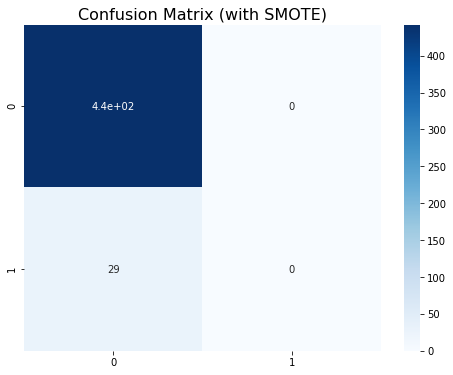

In [38]:
#importing Random Forest Classifier.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

model = RandomForestClassifier(n_jobs = -1, max_depth = 5,random_state=42)
model.fit(X_sm, y_sm )
preds = model.predict(X2_RFE)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')

cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');